In [1]:
import bs4 as bs
import urllib.request
import spacy
import nltk
from spacy.matcher import PhraseMatcher
from spacy import displacy
import warnings
from IPython.display import HTML
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy.lang.pt.stop_words import STOP_WORDS
import pandas as pd
import numpy as np
import random
import seaborn as sns
import string
from spacy.training.example import Example
from spacy.pipeline import TextCategorizer

<span style="font-size: 12.5px; font-family: 'Trebuchet MS', sans-serif;font-weight: 100; letter-spacing: 0.8px;">

# Processamento de Linguagem Natural (PLN) Introdução

<img src="https://miro.medium.com/v2/resize:fit:1400/1*CbzCcP3XFtYVJmWowZLugQ.png" width="500">


**1. Tokenização**

**Tokenização** é o processo de dividir um texto em unidades menores, como palavras ou frases. É o primeiro passo essencial em muitos sistemas de PLN.

- **Palavras (Word Tokenization)**: Divide o texto em palavras individuais.
- **Frases (Sentence Tokenization)**: Divide o texto em frases.

**Exemplos**
- Frase: "Eu gosto de aprender."
- Tokenização de palavras: ["Eu", "gosto", "de", "aprender"]
- Tokenização de frases: ["Eu gosto de aprender."]


**2. Lematização e Stemming**

<img src="https://miro.medium.com/v2/resize:fit:1400/0*6k_6zouDWBMWkehE" width="500">


**Lematização** e **Stemming** são técnicas para reduzir palavras ao seu formato base ou raiz.
- **Lematização**: Reduz palavras à sua forma de dicionário, levando em conta o contexto.
  - Exemplo: "correndo" → "correr"
- **Stemming**: Reduz palavras ao seu radical base, sem considerar o contexto.
  - Exemplo: "correndo" → "corr"

**3. Tagging de Parte do Discurso (POS Tagging)**

**POS Tagging** é o processo de atribuir etiquetas gramaticais às palavras de um texto. Essas etiquetas indicam a função sintática de cada palavra (e.g., substantivo, verbo, adjetivo).

**Exemplo:**
- Frase: "Eu gosto de aprender."
- POS Tags: [("Eu", "PRON"), ("gosto", "VERB"), ("de", "PREP"), ("aprender", "VERB")]

**4. Reconhecimento de Entidades Nomeadas (NER)**

**NER (Named Entity Recognition)** é a identificação e classificação de entidades mencionadas no texto, como nomes de pessoas, organizações, locais, datas, etc.

**Exemplo:**
- Frase: "Barack Obama nasceu em Honolulu."
- NER: [("Barack Obama", "PERSON"), ("Honolulu", "LOCATION")]

**5. Análise de Sentimento**

**Análise de Sentimento** é a tarefa de determinar a atitude ou opinião expressa em um texto. Pode ser categorizada como positiva, negativa ou neutra.

**Exemplo:**
- Frase: "Eu amo este produto!"
- Sentimento: Positivo

**6. Tradução Automática**

**Tradução Automática** é a tradução de texto ou fala de uma língua para outra utilizando modelos de PLN.

**Exemplo:**
- Texto: "Hello, how are you?"
- Tradução: "Olá, como você está?"

**7. Geração de Linguagem Natural (NLG)**

**NLG (Natural Language Generation)** é a geração de texto compreensível em linguagem natural a partir de dados ou representações semânticas.

**Exemplo:**
- Dados: {"temperatura": "22°C", "condição": "ensolarado"}
- Texto gerado: "A temperatura é de 22°C e está ensolarado."

**Parâmetros e Métricas**

**Parâmetros**

- **language**: Especifica o idioma para operações como tokenização e POS tagging.
- **pos**: Parte do discurso utilizada na lematização (e.g., verbo, substantivo).

**Métricas**

- **Precisão (Precision)**: Proporção de entidades corretamente identificadas em relação ao total de entidades identificadas.
- **Revocação (Recall)**: Proporção de entidades corretamente identificadas em relação ao total de entidades existentes no texto.
- **F1-Score**: Média harmônica entre precisão e revocação, utilizada para medir a performance de um modelo de PLN.
- **Índice de Silhueta (Silhouette Score)**: Mede quão semelhante um ponto é ao seu próprio cluster comparado ao cluster mais próximo.
- **Coeficiente de Rand Ajustado (Adjusted Rand Index)**: Avalia a similaridade entre duas partições do mesmo conjunto de dados, ajustado pelo acaso.

</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Configuração
</span>

In [2]:
warnings.filterwarnings("ignore")

In [3]:
pln = spacy.load("pt_core_news_sm")

In [4]:
documento = pln('Testando o processamento de linguagem natural')

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Técnicas de redução
</span>

**Lematização**

In [5]:
for token in documento:
    print(token.text, token.lemma_)

Testando testar
o o
processamento processamento
de de
linguagem linguagem
natural natural


**Stemming**

In [6]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [7]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [8]:
for token in documento:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Testando testar test
o o o
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur


<span style="font-family: 'Trebuchet MS', sans-serif;">

## Dados
</span>

In [9]:
dados =  urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [10]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned

In [11]:
dados_html = bs.BeautifulSoup(
    dados, 'lxml'
)

In [12]:
paragrafos = dados_html.find_all('p')

In [13]:
len(paragrafos)

64

In [14]:
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [15]:
conteudo = conteudo.lower()
conteudo

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Busca em textos com SpaCy
</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Resultados
</span>

In [16]:
pln = spacy.load("pt_core_news_sm")

In [17]:
stringe = 'turing'
token_pesquisa = pln(stringe)

In [18]:
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [19]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

In [20]:
doc[3463:3464], doc[3463-5:3464+5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [21]:
doc[5708:5709], doc[5708-5:5709+5]

(turing, de ter vencido o prêmio turing em 1972 e a medalha)

In [22]:
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)
texto2 = ""

display(HTML(f'<h1>{stringe.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong>{len(matches)}</p>"""))

for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto2 += str(doc[inicio:i[2] + numero_palavras]).replace(stringe, f"<mark>{stringe}</mark>")
    texto2 += "</br></br>"
    
display(HTML(f"""<div style="font-size: 10px;">... {texto2} ...</div>"""))


<span style="font-family: 'Trebuchet MS', sans-serif;">

### Extração de entidades
</span>

In [23]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [24]:
displacy.render(doc, style = 'ent', jupyter = True)

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Nuvem de palavras e stop words
</span>

In [25]:
color_map = ListedColormap(['deeppink', 'green', 'dodgerblue', 'darkorange'])

**Removendo os stop-words**

In [26]:
doc = pln(conteudo)
lista_token = []
for token in doc:
    lista_token.append(token.text)

In [27]:
len(lista_token)

6316

In [28]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [29]:
len(sem_stop)

3651

**Criando a nuvem**

In [30]:
cloud = WordCloud(
    background_color = 'white',
    max_words = 100,
    colormap = color_map,
    width=900,
    height=700,
    min_font_size=15,
    max_font_size=100
)

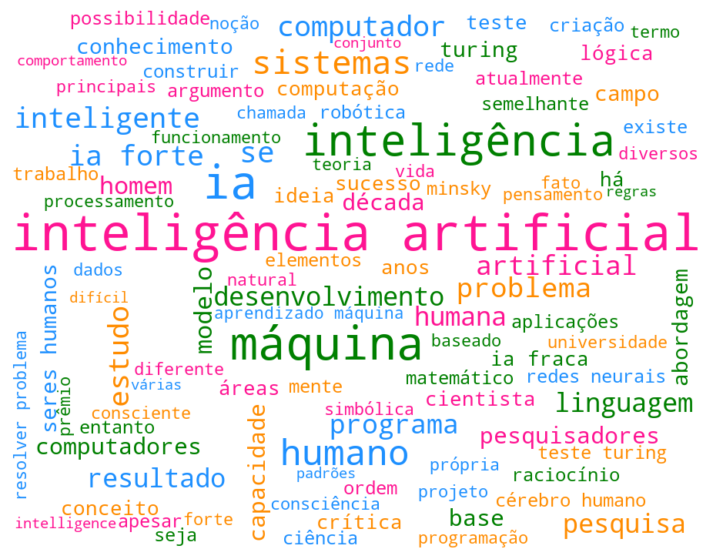

In [31]:
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize = (9, 7))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<span style="font-size: 12.5px; font-family: 'Trebuchet MS', sans-serif;font-weight: 100; letter-spacing: 0.8px;">

# Classificação de sentimentos com SpaCy

Consiste em determinar o sentimento expresso em um texto, como **positivo**, **negativo** ou **neutro**. 

<img src="https://www.theemotionmachine.com/wp-content/uploads/Plutchik-wheel-of-emotions.jpg" width="300">

Essa tarefa tem aplicações em uma variedade de áreas, incluindo análise de redes sociais, análise de opiniões de produtos e serviços, entre outros.

**Pré-processamento** </br>
Antes de realizar a classificação de sentimentos, é importante pré-processar os dados. 
Isso pode incluir etapas como: 
- tokenização
- remoção de stop words
- lematização
- normalização de texto. 
</br>

O pré-processamento adequado dos dados pode melhorar significativamente o desempenho do modelo de classificação de sentimentos.

Ao realizar a classificação de sentimentos com o Spacy, existem vários parâmetros e ajustes que podem ser considerados para melhorar o desempenho do modelo.
Isso inclui ajustar os hiperparâmetros do modelo, como: 
- o tamanho do vetor de palavras
- a taxa de aprendizado
- número de épocas de treinamento.
</br>
 
Além disso, técnicas avançadas, como ajuste fino do modelo e ensembles de modelos, também podem ser exploradas para obter melhores resultados.

</span>

In [32]:
base_dados = pd.read_csv('./data/base_treinamento.txt', encoding = 'utf-8')

In [33]:
base_dados.shape

(438, 2)

<Axes: xlabel='count', ylabel='emocao'>

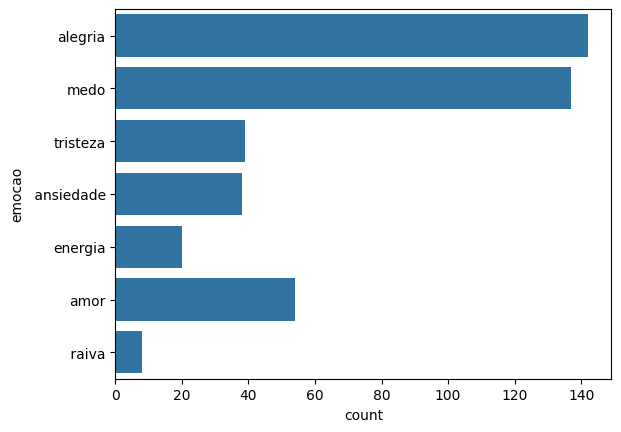

In [34]:
sns.countplot(base_dados['emocao'], label = 'Contagem')

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Pré-processamento dos textos
</span>

In [35]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
stop_words = STOP_WORDS

In [37]:
pln = spacy.load("pt_core_news_sm")

In [38]:
def preprocessing(texto: str):
    texto = texto.lower()
    documento = pln(texto)
    lista = []
    
    for token in documento:
        lista.append(token.lemma_)
    
    lista = [sent for sent in lista if sent not in stop_words and sent not in pontuacoes]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [39]:
teste = preprocessing('Estudando sobre 234 processamento de 0 linguagem natural, aprendizagem de maquina')
teste

'estudar processamento linguagem natural aprendizagem maquina'

<span style="font-family: 'Trebuchet MS', sans-serif;">
    
### Pré-processamento na base de dados
</span>

In [40]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [41]:
base_dados['texto'] = base_dados['texto'].apply(preprocessing)

In [42]:
base_dados

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
...,...,...
433,insulto faca cortar profundamente,raiva
434,medo sombra obscurecer pensamento,medo
435,sensação olhar de o ombro assustadora,medo
436,ruído em o escuro fonte terror,medo


<span style="font-family: 'Trebuchet MS', sans-serif;">

### Processamento para binário
</span>

In [43]:
base_dados_final = []

for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
    if emocao == 'alegria':
        dic = ({
            'ALEGRIA': True,
            'MEDO': False,
            'TRISTEZA': False,
            'ANSIEDADE': False,
            'ENERGIA': False,
            'AMOR': False,
            'RAIVA': False
        })
    elif emocao == 'medo':
        dic = ({
            'ALEGRIA': False,
            'MEDO': True,
            'TRISTEZA': False,
            'ANSIEDADE': False,
            'ENERGIA': False,
            'AMOR': False,
            'RAIVA': False
        })
    elif emocao == 'tristeza':
        dic = ({
            'ALEGRIA': False,
            'MEDO': False,
            'TRISTEZA': True,
            'ANSIEDADE': False,
            'ENERGIA': False,
            'AMOR': False,
            'RAIVA': False
        })
    elif emocao == 'ansiedade':
        dic = ({
            'ALEGRIA': False,
            'MEDO': False,
            'TRISTEZA': False,
            'ANSIEDADE': True,
            'ENERGIA': False,
            'AMOR': False,
            'RAIVA': False
        })
    elif emocao == 'energia':
        dic = ({
            'ALEGRIA': False,
            'MEDO': False,
            'TRISTEZA': False,
            'ANSIEDADE': False,
            'ENERGIA': True,
            'AMOR': False,
            'RAIVA': False
        })
    elif emocao == 'amor':
        dic = ({
            'ALEGRIA': False,
            'MEDO': False,
            'TRISTEZA': False,
            'ANSIEDADE': False,
            'ENERGIA': False,
            'AMOR': True,
            'RAIVA': False
        })
    elif emocao == 'raiva':
        dic = ({
            'ALEGRIA': False,
            'MEDO': False,
            'TRISTEZA': False,
            'ANSIEDADE': False,
            'ENERGIA': False,
            'AMOR': False,
            'RAIVA': True
        })
    base_dados_final.append([texto, dic.copy()])

In [44]:
len(base_dados_final)

438

In [45]:
base_dados_final[2]

['fiz adesão a o curso hoje',
 {'ALEGRIA': True,
  'MEDO': False,
  'TRISTEZA': False,
  'ANSIEDADE': False,
  'ENERGIA': False,
  'AMOR': False,
  'RAIVA': False}]

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Criação do classificador
</span>

In [46]:
modelo = spacy.blank('pt')

textcat = modelo.add_pipe("textcat")

textcat.add_label('ALEGRIA')
textcat.add_label('MEDO')
textcat.add_label('TRISTEZA')
textcat.add_label('ANSIEDADE')
textcat.add_label('ENERGIA')
textcat.add_label('AMOR')
textcat.add_label('RAIVA')


historico = []


In [47]:
optimizer = modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, sgd=optimizer, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)
        

{'textcat': 1.7022919058799744}
{'textcat': 0.01617088855125881}
{'textcat': 0.010937101878007635}
{'textcat': 0.010153173809947564}
{'textcat': 0.015796519805896896}
{'textcat': 0.010601356470940144}
{'textcat': 0.011503764509247887}
{'textcat': 0.010299620555299326}
{'textcat': 0.011361407427301674}
{'textcat': 0.01009161147709521}


In [48]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [49]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.70229191, 0.01617089, 0.0109371 , 0.01015317, 0.01579652,
       0.01060136, 0.01150376, 0.01029962, 0.01136141, 0.01009161])

<span style="font-family: 'Trebuchet MS', sans-serif;">
    
### Gráfico
</span>

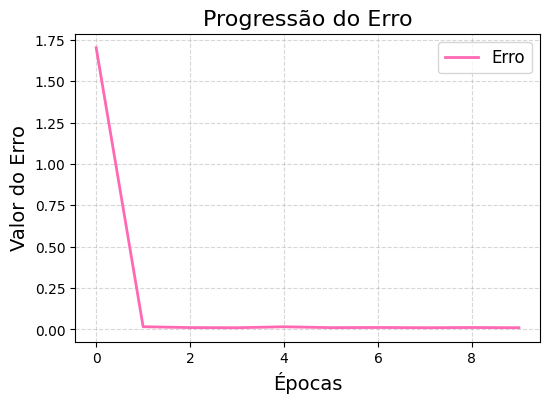

In [51]:
plt.figure(figsize=(6, 4))
plt.plot(historico_loss, color='hotpink', linewidth=2, label='Erro')
plt.title('Progressão do Erro', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Valor do Erro', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.show()

In [52]:
modelo.to_disk("./data/modelo")

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Teste com uma frase
</span>

In [54]:
modelo_carregado = spacy.load('./data/modelo')
modelo_carregado

In [58]:
texto_positivo = 'eu adoro cor de seus olhos'

In [59]:
texto_positivo = preprocessing(texto_positivo)
texto_positivo

'adorar cor olho'

In [66]:
previsao = modelo_carregado(texto_positivo)
resultados = previsao.cats
resultados_ordenados = sorted(resultados.items(), key=lambda x: x[1], reverse=True)

print("Resultado da Previsão:")
for categoria, probabilidade in resultados_ordenados:
    print(f"{categoria}: {probabilidade:.2f}")

Resultado da Previsão:
ALEGRIA: 1.00
ENERGIA: 0.00
AMOR: 0.00
ANSIEDADE: 0.00
RAIVA: 0.00
MEDO: 0.00
TRISTEZA: 0.00


In [67]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessing(texto_negativo))
resultados = previsao.cats
resultados_ordenados = sorted(resultados.items(), key=lambda x: x[1], reverse=True)

print("Resultado da Previsão:")
for categoria, probabilidade in resultados_ordenados:
    print(f"{categoria}: {probabilidade:.2f}")

Resultado da Previsão:
MEDO: 1.00
TRISTEZA: 0.00
ALEGRIA: 0.00
AMOR: 0.00
ENERGIA: 0.00
ANSIEDADE: 0.00
RAIVA: 0.00


<span style="font-family: 'Trebuchet MS', sans-serif;">

## Avaliação do modelo
</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">
    
### Avaliação na base de treinamento
</span>

In [88]:
resultados_formatados = []

for index, row in base_dados.iterrows():
    # Realizar a previsão para o texto atual
    previsaobd = modelo_carregado(row['texto'])

    # Arredondar as probabilidades para duas casas decimais
    probabilidades_formatadas = {emoção: round(
        probabilidade, 2) for emoção, probabilidade in previsaobd.cats.items()}

    # Armazenar os resultados formatados em um dicionário
    resultado_atual = {
        'Texto': row['texto'],
        'Emoção_Prevista': max(previsaobd.cats, key=previsaobd.cats.get),
        'Emoção_Verdadeira': row['emocao'],
        'Probabilidades': probabilidades_formatadas

    }

    # Adicionar o resultado atual à lista de resultados formatados
    resultados_formatados.append(resultado_atual)
df_resultados = pd.DataFrame(resultados_formatados)

In [104]:
df_resultados.sample(5)

,Texto,Emoção_Prevista,Emoção_Verdadeira,Probabilidades
56,adorar doce fruta,ALEGRIA,alegria,"{'ALEGRIA': 1.0, 'MEDO': 0.0, 'TRISTEZA': 0.0,..."
222,incerteza de o futuro assombrar,MEDO,medo,"{'ALEGRIA': 0.0, 'MEDO': 1.0, 'TRISTEZA': 0.0,..."
410,ansiedade parecer sombra seguir,TRISTEZA,ansiedade,"{'ALEGRIA': 0.0, 'MEDO': 0.0, 'TRISTEZA': 0.53..."
23,sentir reconfortar hoje,ALEGRIA,alegria,"{'ALEGRIA': 1.0, 'MEDO': 0.0, 'TRISTEZA': 0.0,..."
52,toquei coração durante,ALEGRIA,alegria,"{'ALEGRIA': 1.0, 'MEDO': 0.0, 'TRISTEZA': 0.0,..."


<span style="font-family: 'Trebuchet MS', sans-serif;">

### Avaliação na base de testes
</span>

In [105]:
base_dados_teste = pd.read_csv('./data/base_teste.txt', encoding = 'utf-8')

In [108]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessing)

In [112]:
resultados_formatados_teste = []

for index, row in base_dados_teste.iterrows():
    # Realizar a previsão para o texto atual
    previsaobd_teste = modelo_carregado(row['texto'])

    # Arredondar as probabilidades para duas casas decimais
    probabilidades_formatadas_teste = {emocao: round(
        probabilidade, 2) for emocao, probabilidade in previsaobd_teste.cats.items()}

    # Armazenar os resultados formatados em um dicionário
    resultado_atual_teste = {
        'Texto': row['texto'],
        'Emoção_Prevista': max(previsaobd_teste.cats, key=previsaobd_teste.cats.get),
        'Emoção_Verdadeira': row['emocao'],
        'Probabilidades': probabilidades_formatadas_teste

    }

    # Adicionar o resultado atual à lista de resultados formatados
    resultados_formatados_teste.append(resultado_atual_teste)
df_resultados_teste = pd.DataFrame(resultados_formatados_teste)

In [113]:
df_resultados_teste

,Texto,Emoção_Prevista,Emoção_Verdadeira,Probabilidades
0,precisar pagar ingresso,MEDO,alegria,"{'ALEGRIA': 0.0, 'MEDO': 0.69, 'TRISTEZA': 0.3..."
1,ajeitar ficar,MEDO,alegria,"{'ALEGRIA': 0.0, 'MEDO': 1.0, 'TRISTEZA': 0.0,..."
2,fortuna ultrapassar,MEDO,alegria,"{'ALEGRIA': 0.01, 'MEDO': 0.71, 'TRISTEZA': 0...."
3,afortunar,ALEGRIA,alegria,"{'ALEGRIA': 1.0, 'MEDO': 0.0, 'TRISTEZA': 0.0,..."
4,benéfico medida,MEDO,alegria,"{'ALEGRIA': 0.34, 'MEDO': 0.61, 'TRISTEZA': 0...."
...,...,...,...,...
400,alegria em o simples de o vida,ALEGRIA,alegria,"{'ALEGRIA': 0.97, 'MEDO': 0.0, 'TRISTEZA': 0.0..."
401,haver tristeza haver alegria,ALEGRIA,alegria,"{'ALEGRIA': 1.0, 'MEDO': 0.0, 'TRISTEZA': 0.0,..."
402,alegria presente valer pena compartilhar,ALEGRIA,alegria,"{'ALEGRIA': 0.71, 'MEDO': 0.0, 'TRISTEZA': 0.1..."
403,dia chance feliz,ALEGRIA,alegria,"{'ALEGRIA': 1.0, 'MEDO': 0.0, 'TRISTEZA': 0.0,..."
